# Proyek Analisis Data: Bike Sharing Dataset (henokhwinetou)
- **Nama:** HENOKH WINETOU CANDRA BAHARI
- **Email:** henokhwinetou@gmail.com
- **ID Dicoding:** henokhwinetou

## Menentukan Pertanyaan Bisnis

- Apakah perbedaan musim mempunyai pengaruh terhadap jumlah penyewaan sepeda?
- Bagaimanakah pengaruh dari Cuaca terhadap tren jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [75]:
with open('script.py', 'w') as f:
    f.write('''
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
''')

In [77]:
!pipreqs .

INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


## Data Wrangling

### Gathering Data

- Gathering data menggunakan dataset hour.csv, dikarenakan data berisikan sangat lengkap dan kompleks.

In [8]:
# Input dataset hour.csv
bike_df = pd.read_csv("hour.csv", delimiter=",")
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**INSIGHT**

Dataset memberikan informasi mengenai rental penyewaan sepeda baik yang sudah terdaftar (registered) maupun tidak terdaftar (casual) berdasarkan jam, hari sibuk, hari libur dan bulan serta dipengaruhi berbagai faktor seperti cuaca, suhu, kelembapan dan kecepatan angin.
- **instant**: nomor urut data
- **dteday**: tanggal data penyewaan
- **season**: musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin) 
- **yr**: tahun, 0 berarti 2011, 1 berarti 2012
- **mnth**: bulan dari 1 hingga 12
- **hr**: jam, dimulai dari 0 hingga 23
- **holiday**: 1 untuk hari libur, 0 untuk bukan libur
- **weekday**: hari dalam seminggu, dimulai dari 0 untuk minggu, dst
- **workingday**: 1 untuk hari kerja, 0 untuk hari tidak bekerja
- **weathersit**: Cuaca (1: Cerah, 2: Berkabut 3: Salju ringan/Hujan ringan, 4: Hujan lebat)
- **temp**: Suhu dalam Celcius
- **atemp**: Suhu 'terasa' dalam Celcius
- **hum**: Kelembapan 
- **windspeed**: Kecepatan angin
- **casual**: jumlah pengguna kasual tanpa pendaftaran
- **registered**: jumlah pengguna terdaftar
- **cnt**: jumlah total sepeda yang disewa, termasuk pengguna kasual dan terdaftar

Keterangan dalam kurung diambil dari readme.txt yang bersumber di dalam folder Bike Sharing Dataset

### Assessing Data

melakukan asessing pada data bike_df terkait adanya missing value, inaccurate value, data duplikat serta kesesuaian tipe data.

In [11]:
# Mengidentifikasi kesesuaian tipe data 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset mempunyai 17,379 baris dan 17 kolom
- Dataset berisikan tipe data yang relevan sesuai dengan kategorinya, kecuali pada salah satu kolom data ***dteday*** yang menggunakan tipe data *object*, seharusnya diganti menjadi *datetime* karena digunakan untuk tipe data string.
- Dataset tidak mempunyai data yang hilang. Adapun muatan memori sebesar 2.3+ MB

In [13]:
# Mengidentifikasi adanya missing value

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Dari hasil pengecekan missing value, gambar menjelaskan bahwa tidak ditemukan missing value yakni 0

In [15]:
# Mengidentifikasi adanya duplikasi data dan inaccurate value

print("jumlah duplikasi: ", bike_df.duplicated().sum())

bike_df.describe()

jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan hasil pengecekan duplikasi data menggunakan duplicated(), didapat hasil bahwa tidak ditemukan adanya data duplikat.
- Tidak ditemukan adanya inaccurate value

In [17]:
# Mengidentifkasi Outliers dengan menghitung Q1, Q3, dan IQR untuk kolom 'cnt'
Q1 = bike_df['cnt'].quantile(0.25)
Q3 = bike_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Mendapatkan outliers
outliers = bike_df[(bike_df['cnt'] < (Q1 - 1.5 * IQR)) | (bike_df['cnt'] > (Q3 + 1.5 * IQR))]
print("Outliers berdasarkan IQR:\n", outliers)

Outliers berdasarkan IQR:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537  2011-08-23       3   0     8  14        0        2   
10358    10359  2012-03-12       1   1     3  17        0        1   
10359    10360  2012-03-12       1   1     3  18        0        1   
10382    10383  2012-03-13       1   1     3  17        0        2   
10383    10384  2012-03-13       1   1     3  18        0        2   
...        ...         ...     ...  ..   ...  ..      ...      ...   
16885    16886  2012-12-11       4   1    12   8        0        2   
16909    16910  2012-12-12       4   1    12   8        0        3   
16933    16934  2012-12-13       4   1    12   8        0        4   
17053    17054  2012-12-18       4   1    12   8        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
5536            1           1  0.72  0.6515  0.30     0.0896

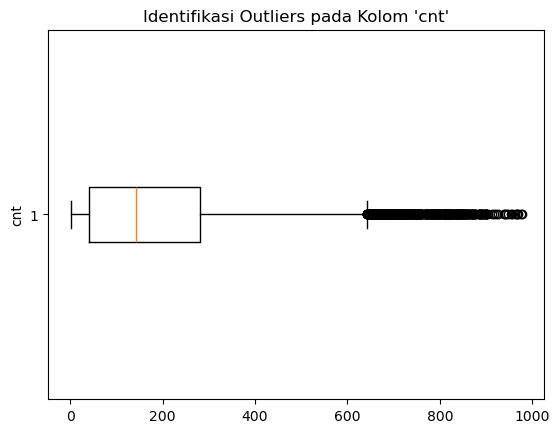

In [18]:
# Mengidentifikasi Outliers dengan membuat boxplot untuk kolom 'cnt'
plt.boxplot(bike_df['cnt'], vert=False)
plt.title("Identifikasi Outliers pada Kolom 'cnt'")
plt.ylabel('cnt')
plt.show()

In [19]:
# Mengidentifikasi outliers dengan menghitung z-score untuk kolom 'cnt'
bike_df['z_score'] = stats.zscore(bike_df['cnt'])

# Mendapatkan outliers berdasarkan threshold z-score
outliers = bike_df[(bike_df['z_score'] > 3) | (bike_df['z_score'] < -3)]
print("Outliers berdasarkan Z-score:\n", outliers)

Outliers berdasarkan Z-score:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
10383    10384  2012-03-13       1   1     3  18        0        2   
10406    10407  2012-03-14       1   1     3  17        0        3   
10407    10408  2012-03-14       1   1     3  18        0        3   
10431    10432  2012-03-15       1   1     3  18        0        4   
10527    10528  2012-03-19       1   1     3  18        0        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15828    15829  2012-10-26       4   1    10  17        0        5   
15848    15849  2012-10-27       4   1    10  13        0        6   
15849    15850  2012-10-27       4   1    10  14        0        6   
16726    16727  2012-12-04       4   1    12  17        0        2   
16741    16742  2012-12-05       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
10383           1           1  0.70  0.6364  0.34     0.

### Cleaning Data

Melakukan perbaikan tipe data pada **dteday** yang masih menggunakan tipe data object, menggantikannya menjadi datetime

In [21]:
# Memperbaiki tipe data pada kolom dteday

datetime_columns = ["dteday"]

for column in datetime_columns:
    bike_df[column] = pd.to_datetime(bike_df[column])

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Kolom data pada **dteday** sudah diganti dari *object* menjadi tipe data *datetime*

#### Menghapus Outliers

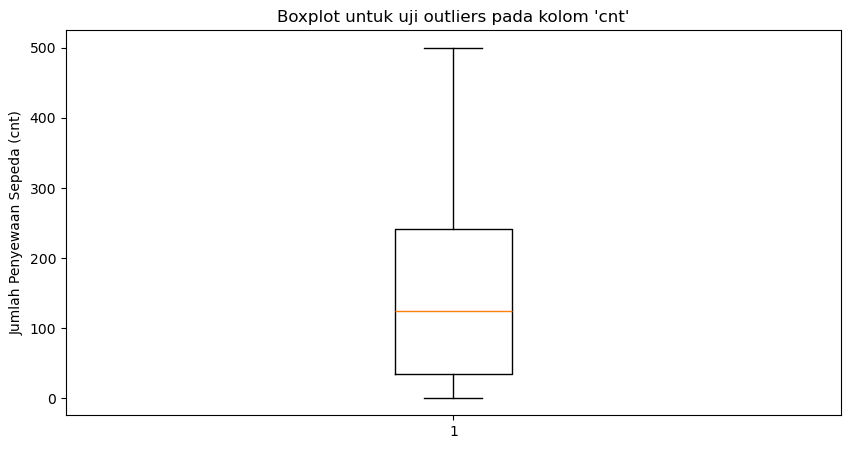

Jumlah data sebelum di-drop: 17379
Jumlah data setelah di-drop: 16100


In [25]:
# Menghitung Q1, Q3, dan IQR
Q1 = bike_df['cnt'].quantile(0.25)
Q3 = bike_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas 
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Atur ambang batas khusus untuk menghilangkan outliers
custom_upper_bound = 500

# Menghapus outliers dengan batas IQR dan tambahan batas khusus
cleaned_bike_df = bike_df[(bike_df['cnt'] >= lower_bound) & (bike_df['cnt'] <= custom_upper_bound)]

# Visualisasi boxplot tanpa outliers
plt.figure(figsize=(10, 5))
plt.boxplot(cleaned_bike_df['cnt'])
plt.title("Boxplot untuk uji outliers pada kolom 'cnt'")
plt.ylabel("Jumlah Penyewaan Sepeda (cnt)")
plt.show()

# Menampilkan jumlah data sebelum dan sesudah outliers dihapus
print(f"Jumlah data sebelum di-drop: {len(bike_df)}")
print(f"Jumlah data setelah di-drop: {len(cleaned_bike_df)}")

**Insight**:
- Outliers sudah tidak ada
- terdapat 16100 data setelah dilakukan dropping

## Exploratory Data Analysis (EDA)

In [28]:
cleaned_bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,z_score
count,16100.000000,16100,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000,16100.000000
mean,8403.173416,2011-12-21 04:28:30.111801344,2.478323,0.473602,6.492547,11.288447,0.030000,2.998634,0.679876,1.439814,0.486399,0.466459,0.635743,0.188431,29.537143,124.438012,153.975155,-0.195653
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.039037
25%,4082.750000,2011-06-23 18:00:00,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.318200,0.490000,0.104500,3.000000,29.000000,35.000000,-0.851588
50%,8220.500000,2011-12-14 00:00:00,2.000000,0.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.480000,0.469700,0.640000,0.164200,14.000000,104.000000,125.000000,-0.355399
75%,12673.250000,2012-06-17 00:00:00,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.606100,0.790000,0.253700,41.000000,191.000000,241.000000,0.284134
max,17379.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,272.000000,494.000000,500.000000,1.712057
std,5010.246149,NaN,1.119524,0.499318,3.495768,7.033504,0.170593,2.011057,0.466539,0.647551,0.191829,0.171643,0.191962,0.122748,38.937434,106.995355,132.130222,0.728462


**Insight:**
- xx
  xx

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### 1. Apakah perbedaan musim mempunyai pengaruh terhadap jumlah penyewaan sepeda?

Pembuatan bar chart dengan menggunakan kolom `season` berdasarkan nilai rerata dari `cnt` untuk melihat bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda

In [33]:
# Mengelompokkan data berdasarkan musim serta menghitung nilai rerata dari jumlah penyewaan sepeda
average_rental_by_season = cleaned_bike_df.groupby('season')['cnt'].mean().reset_index()

# Memberikan label nama musim pada setiap kode angka
season_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
average_rental_by_season['season'] = average_rental_by_season['season'].map(season_mapping)

# Menampilkan hasil
print(average_rental_by_season)

         season         cnt
0    Musim Semi  102.047573
1   Musim Panas  165.024293
2   Musim Gugur  187.876335
3  Musim Dingin  163.031649


**Insight:**
- Musim Gugur mempunyai jumlah rerata penyewaan sepeda tertinggi yakni sebesar 188
- Musim Semi mempunyai jumlah rerata penyewaan sepeda terendah yakni sebesar 102

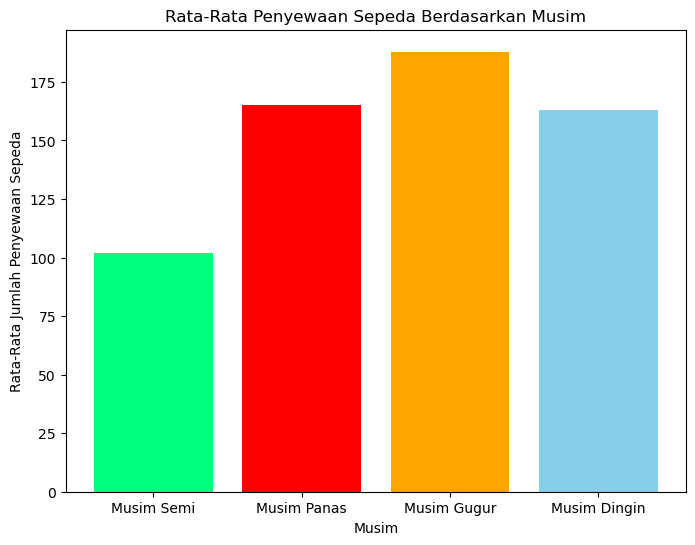

In [35]:
# Visualisasi nilai rata-rata dengan menggunakan bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_rental_by_season['season'], average_rental_by_season['cnt'], color=['springgreen', 'red', 'orange', 'skyblue'])
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Berdasarkan grafik, musim gugur mempunyai nilai rerata tertinggi sedangkan musim semi mempunyai nilai rerata yang paling terendah

### Pertanyaan 2:
#### 2. Bagaimanakah pengaruh dari Cuaca terhadap tren jumlah penyewaan sepeda? 

Pembuatan bar chart dengan menggunakan kolom `weathersit` untuk melihat bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda dengan menggunakan nilai rerata dari kolom `cnt`

In [39]:
# Mengelompokkan data `cnt` berdasarkan kolom `weathersit` dan Menghitung jumlah rata-rata penyewaan sepeda
rental_by_weather = cleaned_bike_df.groupby('weathersit')['cnt'].mean().reset_index()

# Mengubah kode cuaca menjadi kata agar mudah dimengerti
weather_descriptions = {
    1: "Cerah",
    2: "Berkabut",
    3: "Hujan ringan",
    4: "Hujan lebat atau ekstrem"
}

rental_by_weather['weathersit'] = rental_by_weather['weathersit'].map(weather_descriptions)

# Menampilkan hasil dari pengelompokan data
print(rental_by_weather)

                 weathersit         cnt
0                     Cerah  163.044101
1                  Berkabut  150.019043
2              Hujan ringan   98.215474
3  Hujan lebat atau ekstrem   74.333333


**Insight:**
- Cuaca Cerah (1) mempunyai nilai rata-rata penyewaan sepeda tertinggi sebesar 163
- Cuaca Berkabut (2) mempunyai nilai rata-rata penyewaan sepeda tertinggi kedua sebesar 150
- Cuaca Hujan Ringan (3) mempunyai nilai rata-rata penyewaan sepeda terendah kedua sebesar 98
- Cuaca Esktrem (4) mempunyai nilai rata-rata penyewaan sepeda terendah sebesar 73

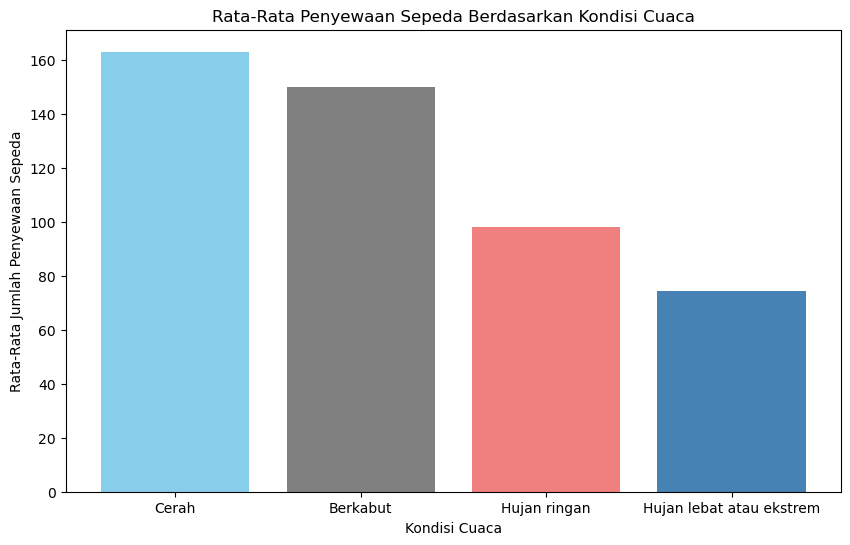

In [41]:
# Visualisasi menggunakan bar chart
plt.figure(figsize=(10, 6))
plt.bar(rental_by_weather['weathersit'], rental_by_weather['cnt'], color=['skyblue', 'gray', 'lightcoral', 'steelblue'])
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
Kondisi cuaca dengan kategori yakni sebagai berikut
- cuaca 1 atau cerah, mempunyai sebaran nilai rerata penyewaan sepeda tertinggi
- cuaca 4 atau ekstrim, mempunyai sebaran nilai rerata penyewaan sepeda terendah

## Analisis Lanjutan (Opsional)

#### Menerapkan metode Clustering untuk mengelompokkan tren penyewaan sepeda berdasarkan pembagian waktu (pagi, siang, sore dan malam).

In [71]:
# Kategorisasi waktu dalam sehari
def categorize_time(hour):
    if 5 <= hour < 11:
        return 'Pagi'      # 05:00 - 11:59
    elif 11 <= hour < 14:
        return 'Siang'     # 12:00 - 16:59
    elif 14 <= hour < 18:
        return 'Sore'      # 17:00 - 20:59
    else:
        return 'Malam'     # 21:00 - 04:59

cleaned_bike_df.loc[:, 'Waktu'] = cleaned_bike_df['hr'].apply(categorize_time)

   Waktu         cnt
0  Malam  110.827769
1   Pagi  148.933642
2  Siang  213.593444
3   Sore  247.159817


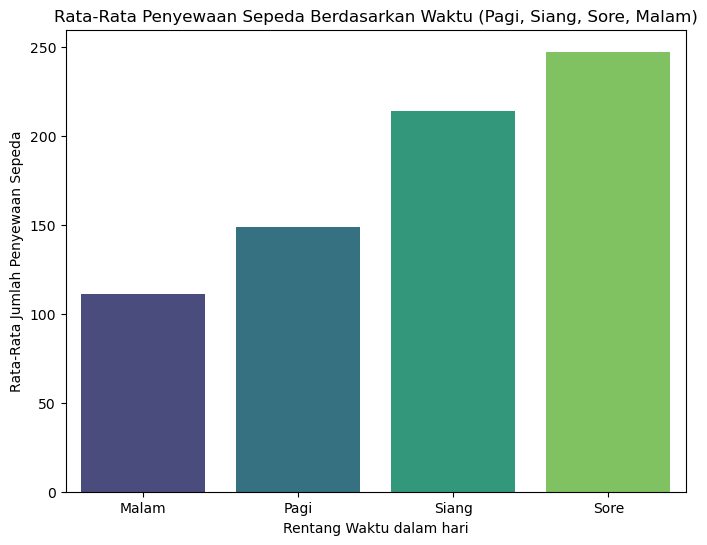

In [46]:
# Mengelompokkan data berdasarkan rentang waktu dan menghitung rata-rata penyewaan
time_avg = cleaned_bike_df.groupby('Waktu').agg({'cnt': 'mean'}).reset_index()
print(time_avg)

# Membuat visualisasi data dengan bar chart terkait persebaran rerata penyewaan sepeda berdasarkan rentang waktu
plt.figure(figsize=(8, 6))
sns.barplot(x='Waktu', y='cnt', data=time_avg, palette='viridis', hue='Waktu', legend=False)
plt.xlabel('Rentang Waktu dalam hari')
plt.ylabel('Rata-Rata Jumlah Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Waktu (Pagi, Siang, Sore, Malam)')
plt.show()

**Insight:**
Berdasarkan pengelompokkan rentang waktu, maka dapat disimpulkan bahwa:
- Nilai rata-rata jumlah penyewaan sepeda pada sore hari merupakan nilai tertinggi 247
- Sedangkan pada malam hari, nilai rata-rata jumlah penyewaan sepeda sangat rendah sebesar 111

## Conclusion

1. Apakah perbedaan musim mempunyai pengaruh terhadap jumlah penyewaan sepeda?
   
**Kesimpulan:** Perbedaan musim memberikan pengaruh terhadap jumlah penyewaan sepeda. Jumlah rata-rata penyewaan sepeda tertinggi pada musim gugur, sementara jumlah rata-rata paling rendah pada musim semi. Ini menunjukkan bahwa permintaan untuk penyewaan sepeda meningkat pada musim yang sejuk namun nyaman, seperti musim gugur.

2. Bagaimanakah pengaruh dari Cuaca terhadap tren jumlah penyewaan sepeda?

**Kesimpulan:** Cuaca dengan kategori Cerah dan Berkabut mempunyai tingkat tertinggi dalam penyewaan sepeda, sedangkan penyewaan menurun signifikan saat hujan ringan dan mencapai titik terendah pada cuaca hujan lebat atau ekstrem.

**Saran:** 
- Menambah jumlah sepeda menjelang musim gugur, guna meningkatkan kapasitas penyewaan pada musim tersebut (jumlah penyewaan tertinggi). 
- Meningkatkan pemasaran dan operasional penyewaan sepeda pada hari yang bercuaca cerah atau berkabut. Sedangkan pada hari bercuaca hujan ringan, berikan promo guna menarik keinginan pelanggan. Pada cuaca ekstrim, sebaiknya mempertimbangkan pengurangan kegiatan operasional sebagai guna menjaga efisiensi biaya.


In [50]:
cleaned_bike_df.to_csv("main_data.csv", index=False)